# Heart Disease Prediction - Logistic Regression with GridSearchCV

**Steps in this notebook:**
1. Load and explore the Mendeley CVD dataset
2. Handle missing values and drop unnecessary columns
3. Split data into training and testing sets
4. Apply Logistic Regression with Hyperparameter Tuning (GridSearchCV)
5. Evaluate model performance (accuracy, confusion matrix, classification report)
6. Visualize correlation heatmap
7. Test model with a new patient example

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Load dataset 
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
# Check null values
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [ ]:
# Drop patientid column (not useful for prediction)
df = df.drop("patientid", axis=1)

In [7]:
# Features and Target
X = df.drop("target", axis=1)   
y = df["target"]                

In [8]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
# Logistic Regression with GridSearchCV
params = {
    "C": [0.01, 0.1, 1, 10],         
    "solver": ["liblinear", "saga"], 
    "penalty": ["l1", "l2"]          
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Score: 0.9586666666666666


c:\Users\zotac\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [10]:
# Train & Test accuracy
train_pred = grid.predict(X_train)
test_pred = grid.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 0.972
Testing Accuracy: 0.964


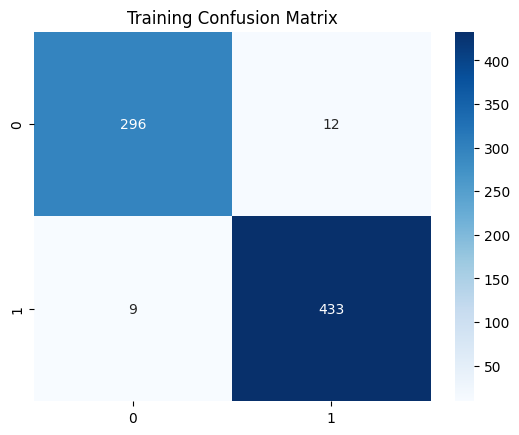

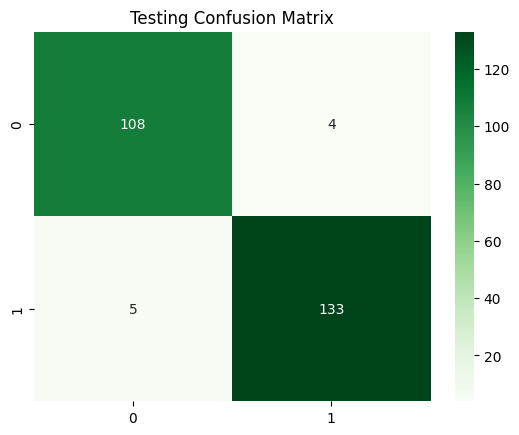

In [11]:
# Confusion Matrices
plt.title("Training Confusion Matrix")
sns.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt="d", cmap="Blues")
plt.show()

plt.title("Testing Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt="d", cmap="Greens")
plt.show()

In [12]:
# Classification Report for Test Data
print("Classification Report (Test Data):\n")
print(classification_report(y_test, test_pred))

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       112
           1       0.97      0.96      0.97       138

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



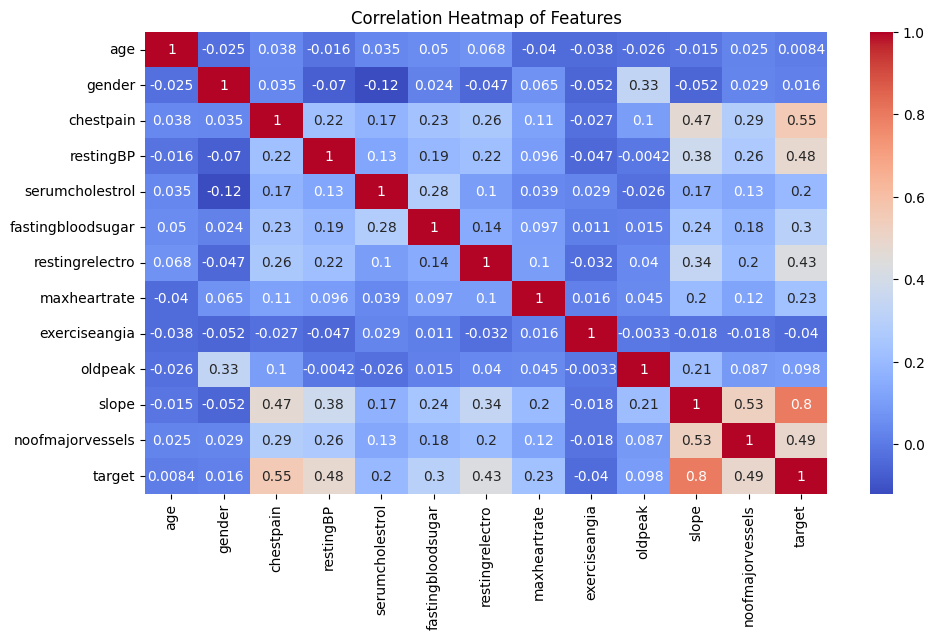

In [16]:
# Correlation heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [17]:
# Predict for a new patient example
new_patient = pd.DataFrame([{
    "age": 55,
    "gender": 1,
    "chestpain": 2,
    "restingBP": 140,
    "serumcholestrol": 250,
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 160,
    "exerciseangia": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "noofmajorvessels": 0
}])

prediction = grid.predict(new_patient)[0]
print("Prediction for new patient:", "Heart Disease" if prediction == 1 else "No Heart Disease")

Prediction for new patient: Heart Disease
